### Question 1 (SLR):  Consider the `marketing` data set (in R package `datarium` ). 
The data set `marketing` contains the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times with different budgets (in thousands of dollar) and the observed sales have been recorded. We want to predict future `sales` (response variable) on the basis of advertising budget spent on `youtube` (explanatory variable).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
marketing=pd.read_csv("marketing.csv")

(1) Create a scatter plot displaying the sales units versus youtube advertising budget.

<Axes: xlabel='sales', ylabel='youtube'>

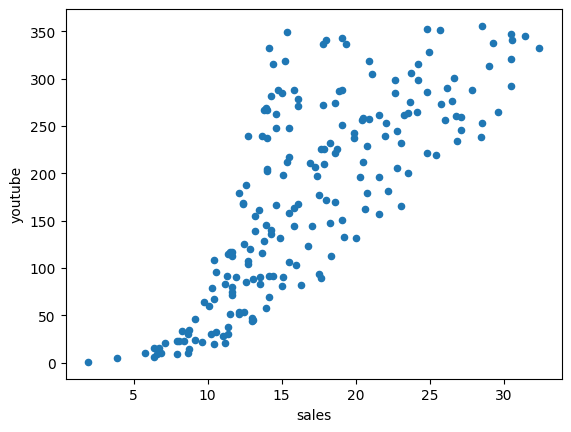

In [3]:
marketing.plot(kind="scatter", x="sales", y="youtube")

(2) It seems there is a linear relationship between the two variables from (1). Create a scatter plot displaying the two variables with a fitted regression line on it.

<Axes: xlabel='sales', ylabel='youtube'>

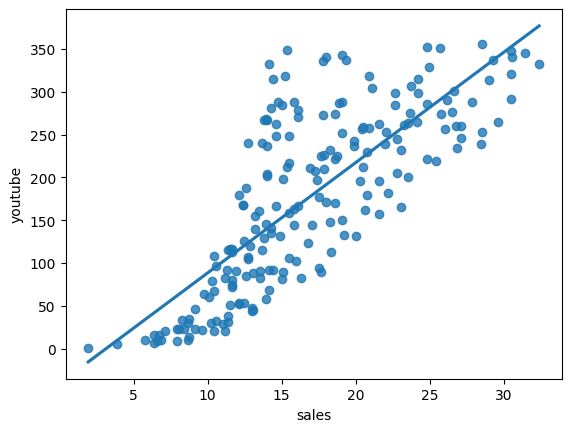

In [4]:
import seaborn as sns
sns.regplot(data=marketing,x='sales', y='youtube',ci=None)

(3) Fit the simple linear regression model. Is the model useful at significance level 0.01? (Hint: the model is useful means $H_0: \beta_1=0$ is rejected).
**ANS:** 

(4)  Find a 99% confidence interval of $\beta_1$. \
**ANS:** 

(5) Obtain the ANOVA table for the model.

(6) Find the value of the Coefficient of Determination.\
**ANS:** 

(7) The company plans to spend 310 (in thousands of dollar) on youtube advertising, what is the expected sales?  Find a 99% confidence interval of the 'true' average sales and a 99% prediction confidence interval of the 'true' sales. \

**ANS:**

#### Question 2: Multiple Linear Regression Models
Consider the Auto MPG data set (http://archive.ics.uci.edu/ml/datasets/auto%20mpg). Let the variable `mpg` be the response variable.  For description of the data set, please go to https://archive.ics.uci.edu/ml/datasets/auto+mpg.


In [1]:
import pandas as pd
columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
data=pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', header=None, names=columns)


(1) Clean the data by removing all missing values.

(2) Use Scatterplot Matrix to check the relationship among the first five numerical variables: 'mpg','displacement','horsepower','weight','acceleration'.

(3) Fit a MLR model with covariates displacement, horsepower, weight, and acceleration.   Is the model as shown by the F-test useful at significance level 0.01?

**Ans**:  

(4) Do all variables contribute to the model significantly by their respective t-test?  Test the significance of the variables **jointly** if their individual t-test have large p-values.

**Ans**:  

(5) Remove the nonsignifcant variables and refit a MLR model with the remaining predictors in the model. Are all variables significant at significance level 0.01?.

**Ans:** 

(6) Add the categorical variable `cylinders` to the model in (5). What is the fitted regression equation for cars with 5 cylinders?

**Ans:** 